In [1]:
import cv2
import dlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [21]:
def mask_landmarks(image, landmarks, face):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    points = []

    face_points = np.array([
        (face.left(), face.top()),
        (face.right(), face.top()),
        (face.right(), face.bottom()),
        (face.left(), face.bottom())
    ], np.int32)
    cv2.fillPoly(mask, [face_points], 255)
    
    # Eyebrows
    eyebrows = []
    eyebrows += [landmarks.part(i) for i in range(18, 27)]
    eyebrows = np.array([(point.x, point.y) for point in eyebrows], np.int32)
    cv2.fillPoly(mask, [eyebrows], 0)
    
    # Nostrils
    nostrils = []
    nostrils += [landmarks.part(i) for i in range(32, 36)]
    nostrils = np.array([(point.x, point.y) for point in nostrils], np.int32)
    cv2.fillPoly(mask, [nostrils], 0)
    
    # Eyes
    eyesL = []
    eyesL += [landmarks.part(i) for i in range(37, 42)]
    eyesL = np.array([(point.x, point.y) for point in eyesL], np.int32)
    cv2.fillPoly(mask, [eyesL], 0)
    eyesR = []
    eyesR += [landmarks.part(i) for i in range(43, 48)]
    eyesR = np.array([(point.x, point.y) for point in eyesR], np.int32)
    cv2.fillPoly(mask, [eyesR], 0)
    
    # Lips
    lips = []
    lips += [landmarks.part(i) for i in range(48, 68)]
    lips = np.array([(point.x, point.y) for point in lips], np.int32)
    cv2.fillPoly(mask, [lips], 0)
    
#     points = np.array([(point.x, point.y) for point in points], np.int32)
#     cv2.fillPoly(mask, [points], 0)
    
    #final_mask = cv2.bitwise_not(mask)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.show()
    return mask

In [25]:
def detect_wrinkles(image, mask):
    masked_image = cv2.bitwise_and(image, image, mask=mask)  
    gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
#     edges = cv2.bitwise_and(edges, edges, mask=mask)
    plt.imshow(edges, cmap='gray')
    plt.show()
    return edges

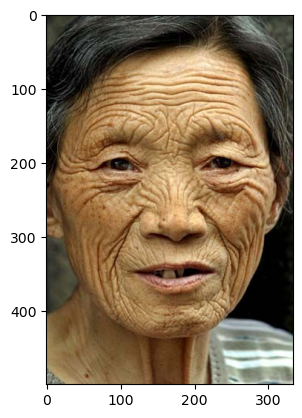

In [15]:
image = cv2.imread('face.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
faces = face_detector(image)

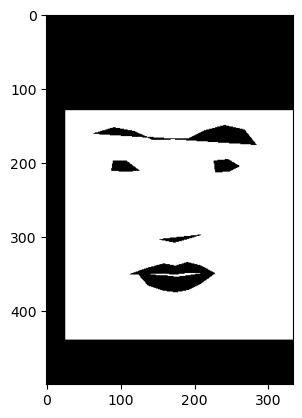

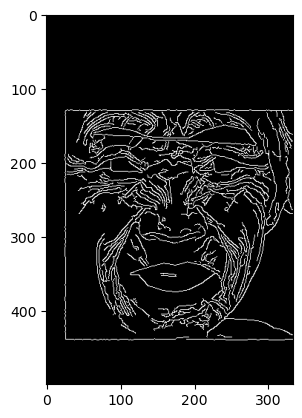

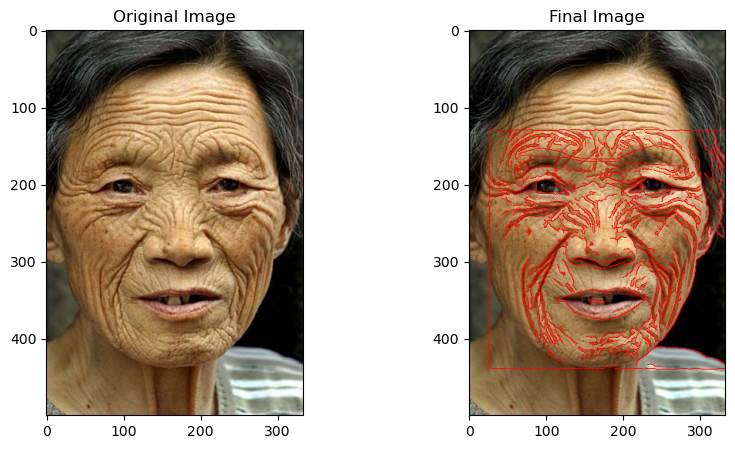

In [26]:
for face in faces:
    landmarks = landmark_detector(image, face)
    mask = mask_landmarks(image, landmarks, face)
    
    wrinkles = detect_wrinkles(image, mask)
    
    result = image.copy()
    
    # Highlight wrinkles on the original image
    result[wrinkles > 0] = [0, 0, 255]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 2, 2)
    plt.title('Final Image')
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    
    plt.show()
